In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


In [2]:
#import csvs and format dates for consistency
washington_weather_data = pd.read_csv("Resources/WashingtonDataCenter.csv")
washington_weather_data["Date"] = pd.to_datetime(washington_weather_data["Date"]).dt.strftime('%m/%d/%y')

iceland_weather_data = pd.read_csv("Resources/ReykjavikIcelandDataCenter.csv")
iceland_weather_data["Date"] = pd.to_datetime(iceland_weather_data["Date"]).dt.strftime('%m/%d/%y')

bitcoin = pd.read_csv("Resources/BTC-USD.csv")
bitcoin["Date"] = pd.to_datetime(bitcoin["Date"]).dt.strftime('%m/%d/%y')

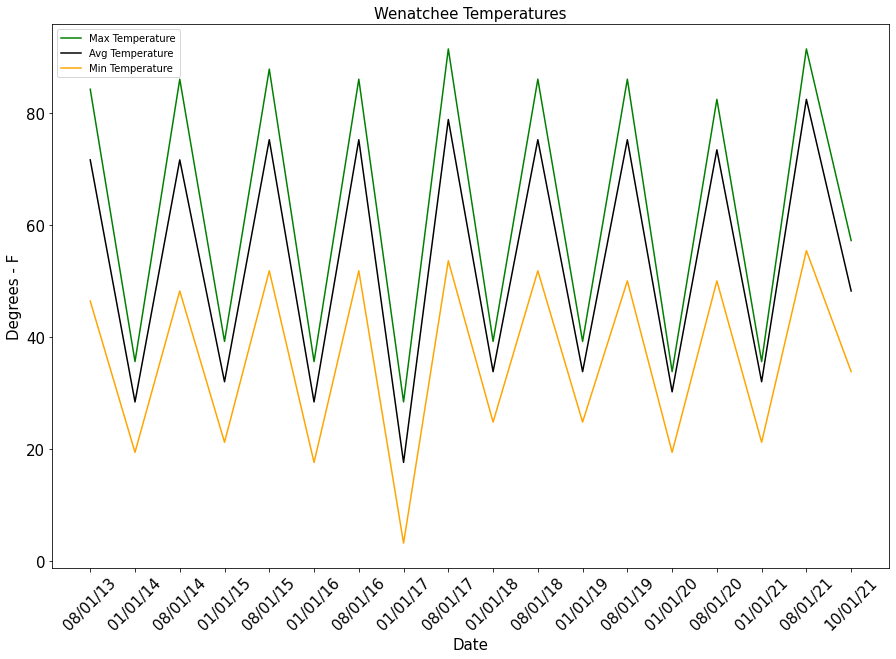

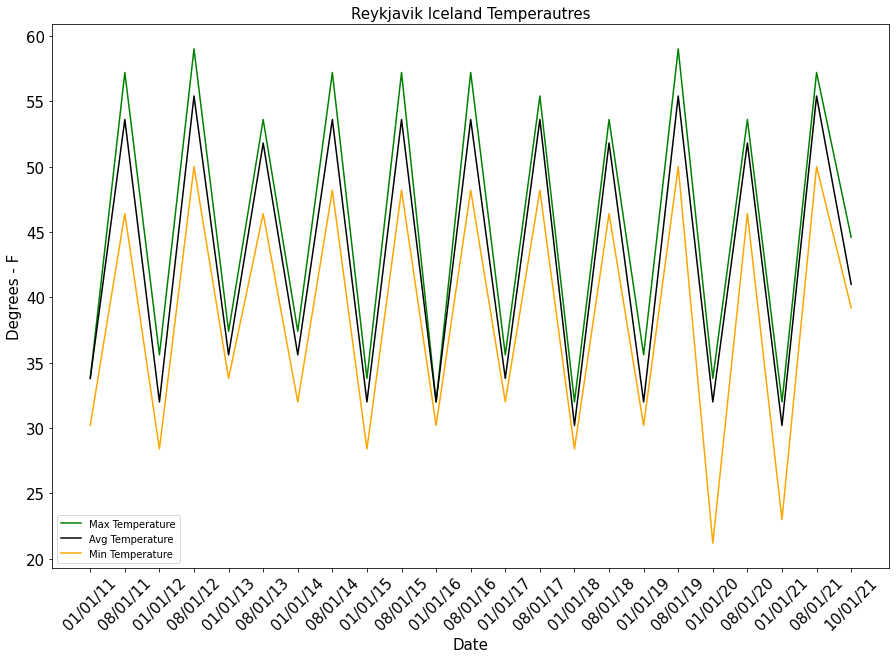

In [15]:
#review what the Washington and Reykjavik twinter and summer temperatures are each year
#Washington temperature plot
dates = washington_weather_data["Date"]
MaxTemp = washington_weather_data["Max Temp"]
AvgTemp = washington_weather_data["Avg Temp"]
MinTemp = washington_weather_data["Min Temp"]

plt.figure(figsize=(15, 10))

plt.plot(dates, MaxTemp, color="green", label="Max Temperature")
plt.plot(dates, AvgTemp, color="black", label="Avg Temperature")
plt.plot(dates, MinTemp, color="orange", label="Min Temperature")
plt.legend(loc="best")
plt.title("Wenatchee Temperatures", fontsize=15)
plt.xticks(rotation=45)
plt.xticks(fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Degrees - F", fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Output/fig_temp_1.png")

plt.show()

#reykjavik temperature plot
dates = iceland_weather_data["Date"]
MaxTemp = iceland_weather_data["Max Temp"]
AvgTemp = iceland_weather_data["Avg Temp"]
MinTemp = iceland_weather_data["Min Temp"]

plt.figure(figsize=(15, 10))

plt.plot(dates, MaxTemp, color="green", label="Max Temperature")
plt.plot(dates, AvgTemp, color="black", label="Avg Temperature")
plt.plot(dates, MinTemp, color="orange", label="Min Temperature")
plt.legend(loc="best")
plt.title("Reykjavik Iceland Temperautres", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.xticks(rotation=45)
plt.xticks(fontsize=15)
plt.ylabel("Degrees - F", fontsize=15)
plt.yticks(fontsize=15)

plt.savefig("Output/fig_temp_2.png")
plt.show()



In [16]:
#merging the Washington and Reykjavik data frames and formatting the columns
weather_df = pd.merge(washington_weather_data, iceland_weather_data, how="inner", on="Date")
weather_df.rename(columns = {'Max Temp_x':'Max Temp Washington', 'Avg Temp_x':'Avg Temp Washington', 'Min Temp_x':'Min Temp Washington','Max Temp_y':'Max Temp Reykjavik', 'Avg Temp_y':'Avg Temp Reykjavik', 'Min Temp_y':'Min Temp Reykjavik'}, inplace = True)

#merging the weather dataframe with the bitcoin dataframe
bit_weather_df = pd.merge(weather_df, bitcoin, how="inner", on="Date")
bit_weather_df

,Date,Max Temp Washington,Avg Temp Washington,Min Temp Washington,Max Temp Reykjavik,Avg Temp Reykjavik,Min Temp Reykjavik,Open,High,Low,Close,Adj Close,Volume
0,01/01/17,28.4,17.6,3.2,35.6,33.8,32.0,963.658020,1003.080017,958.698975,998.325012,998.325012,1.477750e+08
1,08/01/17,91.4,78.8,53.6,55.4,53.6,48.2,2871.300049,2921.350098,2685.610107,2718.260010,2718.260010,1.324670e+09
2,01/01/18,39.2,33.8,24.8,32.0,30.2,28.4,14112.200200,14112.200200,13154.700200,13657.200200,13657.200200,1.029120e+10
3,08/01/18,86.0,75.2,51.8,53.6,51.8,46.4,7769.040039,7769.040039,7504.950195,7624.910156,7624.910156,4.797620e+09
4,01/01/19,39.2,33.8,24.8,35.6,32.0,30.2,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09
5,08/01/19,86.0,75.2,50.0,59.0,55.4,50.0,10077.442380,10446.919920,9922.019531,10399.668950,10399.668950,1.716534e+10
6,01/01/20,33.8,30.2,19.4,33.8,32.0,21.2,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10
7,08/01/20,82.4,73.4,50.0,53.6,51.8,46.4,11322.570310,11794.775390,11239.682620,11759.592770,11759.592770,2.607567e+10
8,01/01/21,35.6,32.0,21.2,32.0,30.2,23.0,28994.009770,29600.626950,28803.585940,29374.152340,29374.152340,4.073030e+10
9,08/01/21,91.4,82.4,55.4,57.2,55.4,50.0,41460.843750,42541.679690,39540.941410,39974.894530,39974.894530,2.668844e+10


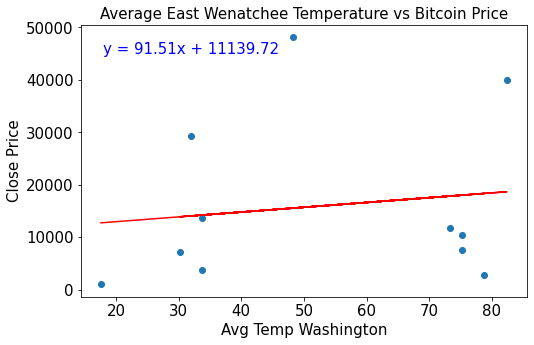

The correlation between both factors is 0.14


In [17]:
#plotting the average washington temperature vs bitcoin price
x_values = bit_weather_df['Avg Temp Washington']
y_values = bit_weather_df['Close']

plt.figure(figsize=(8, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18, 45000),fontsize=15,color="blue")
plt.title("Average East Wenatchee Temperature vs Bitcoin Price", fontsize=15)
plt.xlabel('Avg Temp Washington', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Output/fig_temp_3.png")
plt.show()

correlation = st.pearsonr(bit_weather_df['Avg Temp Washington'],bit_weather_df['Close'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

 - The above doesnt tell us much as its reading both winter and summer months. This contradicts any sort of correlation there may be, so we decided to seperate the winter and summer months into their own dataframes for review. 

In [6]:
#create January weather dataframe
jan_data = bit_weather_df.loc[(bit_weather_df["Date"]== "01/01/17") | 
                              (bit_weather_df["Date"]== "01/01/18") | 
                              (bit_weather_df["Date"]== "01/01/19") | 
                              (bit_weather_df["Date"]== "01/01/20") | 
                              (bit_weather_df["Date"]== "01/01/21")]


In [7]:
#create August weather dataframe
aug_data = bit_weather_df.loc[(bit_weather_df["Date"]== "08/01/17") | 
                              (bit_weather_df["Date"]== "08/01/18") | 
                              (bit_weather_df["Date"]== "08/01/19") | 
                              (bit_weather_df["Date"]== "08/01/20") | 
                              (bit_weather_df["Date"]== "08/01/21")]


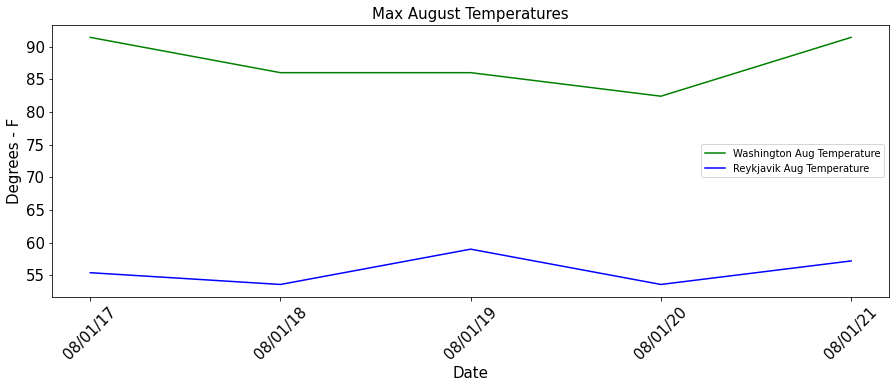

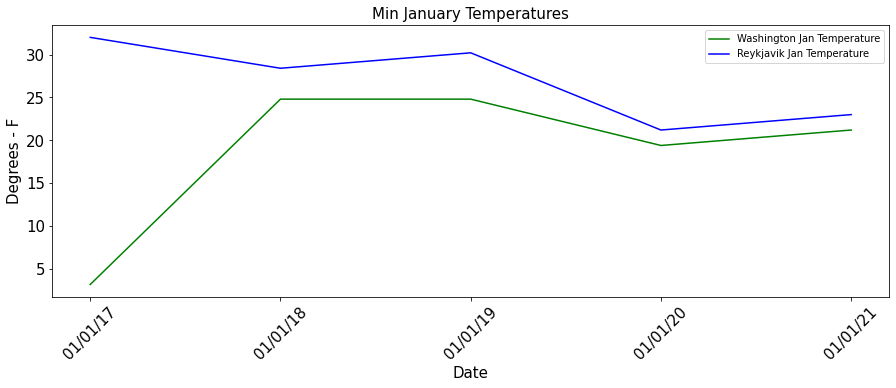

In [18]:
#review what the Washington and Reykjavik winter and summer temperatures are each year
#summer temperature plot
dates = aug_data ["Date"]
washington_max_temp = aug_data ["Max Temp Washington"]
reykjavik_max_temp = aug_data ["Max Temp Reykjavik"]


plt.figure(figsize=(15, 5))

plt.plot(dates, washington_max_temp, color="green", label="Washington Aug Temperature")
plt.plot(dates, reykjavik_max_temp, color="blue", label="Reykjavik Aug Temperature")

plt.legend(loc="best")
plt.title("Max August Temperatures", fontsize=15)
plt.xticks(rotation=45)
plt.xticks(fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Degrees - F", fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Output/fig_temp_4.png")
plt.show()

#winter temperature plot
dates = jan_data ["Date"]
washington_min_temp = jan_data ["Min Temp Washington"]
reykjavik_min_temp = jan_data ["Min Temp Reykjavik"]


plt.figure(figsize=(15, 5))

plt.plot(dates, washington_min_temp, color="green", label="Washington Jan Temperature")
plt.plot(dates, reykjavik_min_temp, color="blue", label="Reykjavik Jan Temperature")

plt.legend(loc="best")
plt.title("Min January Temperatures", fontsize=15)
plt.xticks(rotation=45)
plt.xticks(fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Degrees - F", fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Output/fig_temp_5.png")
plt.show()

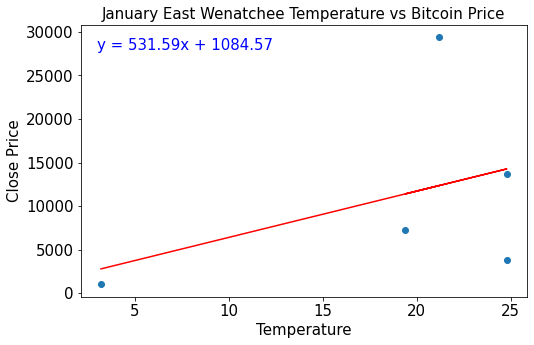

The correlation between both factors is 0.42


In [19]:
#plot minimum winter Washington temperatures vs bitcoin price
x_values = jan_data['Min Temp Washington']
y_values = jan_data['Close']

plt.figure(figsize=(8, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,28000),fontsize=15,color="blue")
plt.title("January East Wenatchee Temperature vs Bitcoin Price", fontsize=15)
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Output/fig_temp_6.png")
plt.show()

correlation = st.pearsonr(jan_data['Min Temp Washington'],jan_data['Close'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

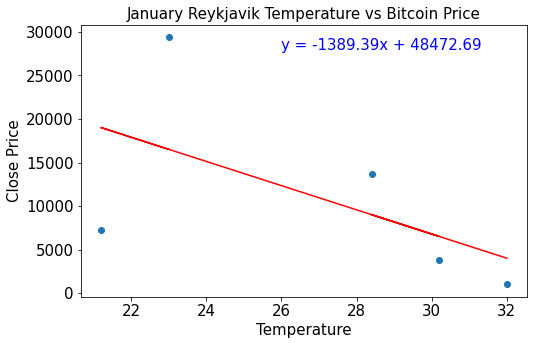

The correlation between both factors is -0.57


In [20]:
#plot minimum winter Reykjavik temperatures vs bitcoin price
x_values = jan_data['Min Temp Reykjavik']
y_values = jan_data['Close']

plt.figure(figsize=(8, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,28000),fontsize=15,color="blue")
plt.title("January Reykjavik Temperature vs Bitcoin Price", fontsize=15)
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Output/fig_temp_7.png")
plt.show()

correlation = st.pearsonr(jan_data['Min Temp Reykjavik'],jan_data['Close'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

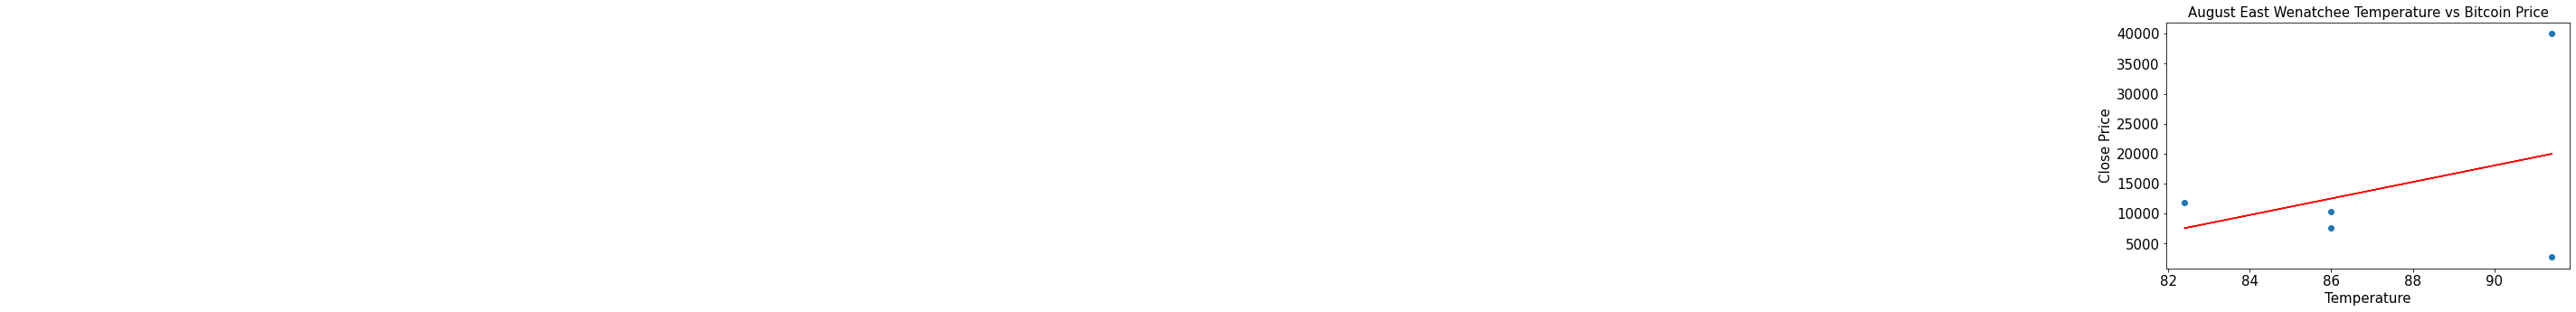

The correlation between both factors is 0.37


In [21]:
#plot maximum summer Washington temperatures vs bitcoin price
x_values = aug_data['Max Temp Washington']
y_values = aug_data['Close']

plt.figure(figsize=(8, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(29,28000),fontsize=15,color="blue")
plt.title("August East Wenatchee Temperature vs Bitcoin Price", fontsize=15)
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Output/fig_temp_8.png")
plt.show()

correlation = st.pearsonr(aug_data['Max Temp Washington'],aug_data['Close'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

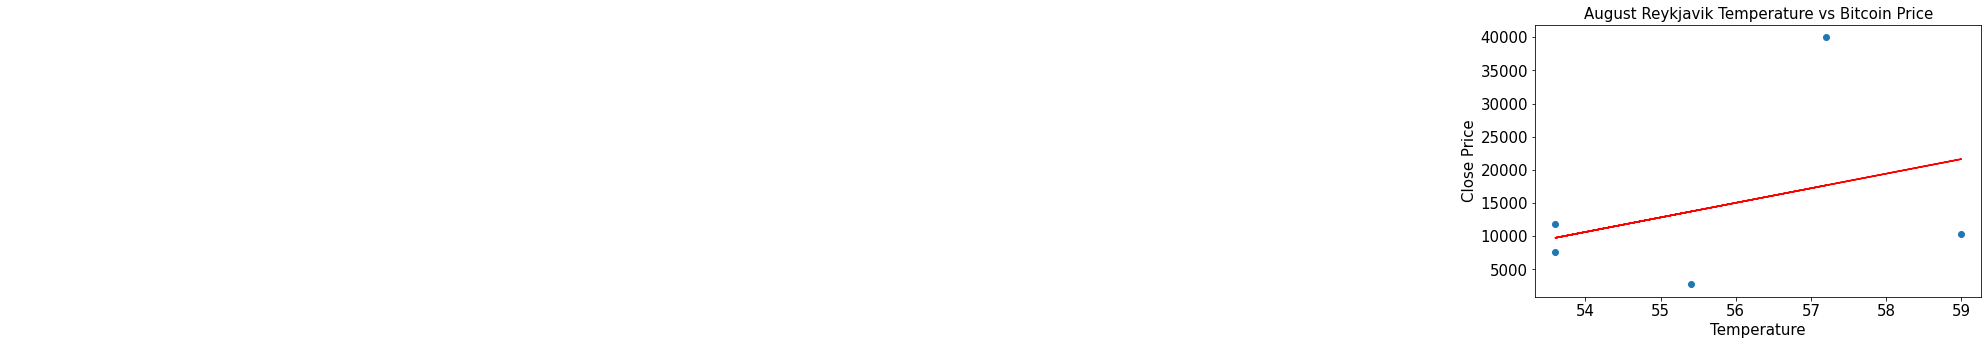

The correlation between both factors is 0.35


In [22]:
#plot maximum summer Reykjavik temperatures vs bitcoin price
x_values = aug_data['Max Temp Reykjavik']
y_values = aug_data['Close']

plt.figure(figsize=(8, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(33,28000),fontsize=15,color="blue")
plt.title("August Reykjavik Temperature vs Bitcoin Price", fontsize=15)
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Output/fig_temp_9.png")
plt.show()

correlation = st.pearsonr(aug_data['Max Temp Reykjavik'],aug_data['Close'])
print(f"The correlation between both factors is {round(correlation[0],2)}")